In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [53]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['koi_disposition_CONFIRMED'],name='Actual')))
    return 1

In [18]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418,0.000,-0.000,162.514,0.004,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,FALSE POSITIVE,0,1,0,0,19.899,0.000,-0.000,175.850,0.001,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
2,FALSE POSITIVE,0,1,0,0,1.737,0.000,-0.000,170.308,0.000,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
3,CONFIRMED,0,0,0,0,2.526,0.000,-0.000,171.596,0.001,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
4,CONFIRMED,0,0,0,0,4.134,0.000,-0.000,172.979,0.002,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.286,48.225,15.714


In [19]:
df.head()
data =  df['koi_disposition']!='CANDIDATE'
data.head()

0    True
1    True
2    True
3    True
4    True
Name: koi_disposition, dtype: bool

In [20]:
data2 = df[data]
data2.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418,0.000,-0.000,162.514,0.004,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,FALSE POSITIVE,0,1,0,0,19.899,0.000,-0.000,175.850,0.001,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
2,FALSE POSITIVE,0,1,0,0,1.737,0.000,-0.000,170.308,0.000,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
3,CONFIRMED,0,0,0,0,2.526,0.000,-0.000,171.596,0.001,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
4,CONFIRMED,0,0,0,0,4.134,0.000,-0.000,172.979,0.002,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.286,48.225,15.714


In [26]:
data3 = data2[['koi_disposition','koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', \
          'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', \
          'koi_kepmag']]
data3.head()

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418,162.514,0.586,4.507,874.800,2.830,443,9.110,25.800,2,5455,4.467,0.927,291.934,48.142,15.347
1,FALSE POSITIVE,19.899,175.850,0.969,1.782,10829.000,14.600,638,39.300,76.300,1,5853,4.544,0.868,297.005,48.134,15.436
2,FALSE POSITIVE,1.737,170.308,1.276,2.406,8079.200,33.460,1395,891.960,505.600,1,5805,4.564,0.791,285.535,48.285,15.597
3,CONFIRMED,2.526,171.596,0.701,1.655,603.300,2.750,1406,926.160,40.900,1,6031,4.438,1.046,288.755,48.226,15.509
4,CONFIRMED,4.134,172.979,0.762,3.140,686.000,2.770,1160,427.650,40.200,2,6046,4.486,0.972,296.286,48.225,15.714


In [28]:
data4 = pd.get_dummies(data3)
data4.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,54.418,162.514,0.586,4.507,874.800,2.830,443,9.110,25.800,2,5455,4.467,0.927,291.934,48.142,15.347,1,0
1,19.899,175.850,0.969,1.782,10829.000,14.600,638,39.300,76.300,1,5853,4.544,0.868,297.005,48.134,15.436,0,1
2,1.737,170.308,1.276,2.406,8079.200,33.460,1395,891.960,505.600,1,5805,4.564,0.791,285.535,48.285,15.597,0,1
3,2.526,171.596,0.701,1.655,603.300,2.750,1406,926.160,40.900,1,6031,4.438,1.046,288.755,48.226,15.509,1,0
4,4.134,172.979,0.762,3.140,686.000,2.770,1160,427.650,40.200,2,6046,4.486,0.972,296.286,48.225,15.714,1,0


In [30]:
data5 = data4.drop(['koi_disposition_FALSE POSITIVE'], axis=1)
data5.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_disposition_CONFIRMED
0,54.418,162.514,0.586,4.507,874.800,2.830,443,9.110,25.800,2,5455,4.467,0.927,291.934,48.142,15.347,1
1,19.899,175.850,0.969,1.782,10829.000,14.600,638,39.300,76.300,1,5853,4.544,0.868,297.005,48.134,15.436,0
2,1.737,170.308,1.276,2.406,8079.200,33.460,1395,891.960,505.600,1,5805,4.564,0.791,285.535,48.285,15.597,0
3,2.526,171.596,0.701,1.655,603.300,2.750,1406,926.160,40.900,1,6031,4.438,1.046,288.755,48.226,15.509,1
4,4.134,172.979,0.762,3.140,686.000,2.770,1160,427.650,40.200,2,6046,4.486,0.972,296.286,48.225,15.714,1


In [31]:
y = data5.koi_disposition_CONFIRMED
X = data5[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', \
          'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', \
          'koi_kepmag']]

In [32]:
y.value_counts()

0    3504
1    1800
Name: koi_disposition_CONFIRMED, dtype: int64

In [33]:
categorical_feature_columns = list(set(data5.columns) - set(data5._get_numeric_data().columns))
categorical_feature_columns

[]

In [36]:
numerical_feature_columns = list(data5._get_numeric_data().columns)
numerical_feature_columns

['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag',
 'koi_disposition_CONFIRMED']

In [43]:
target = 'koi_disposition_CONFIRMED'

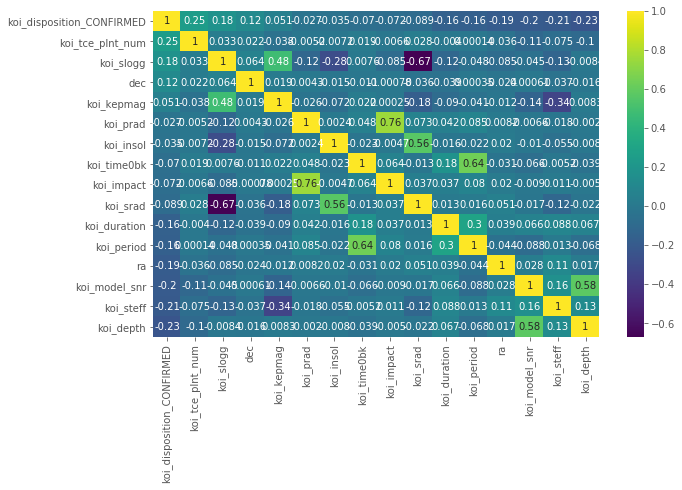

In [44]:
k = 16 #number of variables for heatmap
cols = data5[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = data5[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [47]:
X = data5.loc[:, data5.columns != target]
Y = data5.loc[:, data5.columns == target]

In [48]:
X.shape

(5304, 16)

In [49]:
Y.shape

(5304, 1)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [51]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [54]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.8309537407195888
F1 score is:  0.7708978328173375


Actual      0    1
Predicted         
0          82  206
1          59  137


1

In [55]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [56]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
4,koi_depth,52691712.230
7,koi_insol,17854746.731
8,koi_model_snr,337037.005
5,koi_prad,225069.118
6,koi_teq,159764.475
0,koi_period,23594.829
10,koi_steff,17128.515
12,koi_srad,534.411
3,koi_duration,528.749
1,koi_time0bk,413.373
